In [54]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset


In [55]:
# Set random seeds for reproducibility
torch.manual_seed(42)

In [56]:
df = pd.read_csv("fmnist_small.csv")

In [57]:
df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,9,0,0,0,0,0,0,0,0,0,...,0,7,0,50,205,196,213,165,0,0
1,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,...,142,142,142,21,0,3,0,0,0,0
3,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,8,0,0,0,0,0,0,0,0,0,...,213,203,174,151,188,10,0,0,0,0


In [58]:
df.shape

(6000, 785)

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Columns: 785 entries, label to pixel784
dtypes: int64(785)
memory usage: 35.9 MB


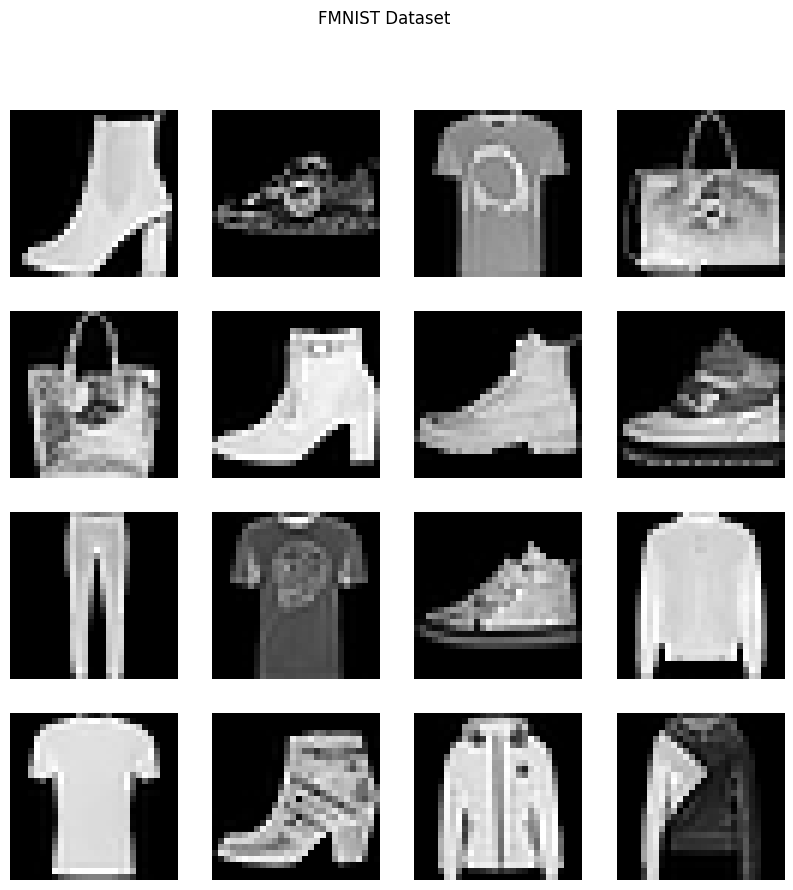

In [60]:
# Create 4X4 grid of image
fig,axis=plt.subplots(4,4,figsize=(10,10))
fig.suptitle("FMNIST Dataset")

for i in range(4):
    for j in range(4):
        axis[i,j].imshow(df.iloc[i*4+j,1:].values.reshape(28,28),cmap="gray")
        axis[i,j].axis("off")
plt.show()


In [84]:
X=df.drop("label",axis=1)
Y=df["label"]

In [85]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [86]:
# Scalling in code
X_train = X_train / 255.0
X_test = X_test / 255.0

In [87]:
X_train

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
3897,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
5628,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.003922,...,0.356863,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
1756,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
2346,0.0,0.0,0.0,0.0,0.0,0.003922,0.000000,0.000000,0.0,0.000000,...,0.003922,0.000000,0.000000,0.000000,0.000000,0.254902,0.090196,0.000000,0.0,0.0
2996,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3772,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.262745,...,0.533333,0.470588,0.286275,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
5191,0.0,0.0,0.0,0.0,0.0,0.000000,0.003922,0.000000,0.0,0.200000,...,0.000000,0.000000,0.003922,0.000000,0.031373,0.258824,0.000000,0.000000,0.0,0.0
5226,0.0,0.0,0.0,0.0,0.0,0.000000,0.011765,0.003922,0.0,0.000000,...,0.439216,0.474510,0.474510,0.027451,0.000000,0.003922,0.000000,0.000000,0.0,0.0
5390,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0


### DATASETS and DATA LOADING



In [88]:
y_test

1782    7
3917    0
221     5
2135    6
5224    3
       ..
2543    7
1773    5
2846    7
5799    1
1765    2
Name: label, Length: 1200, dtype: int64

In [89]:
y_train 

3897    7
5628    6
1756    7
2346    6
2996    8
       ..
3772    3
5191    6
5226    0
5390    8
860     6
Name: label, Length: 4800, dtype: int64

In [92]:
X_train=torch.tensor(X_train.values,dtype=torch.float32)
y_train=torch.tensor(y_train.values,dtype=torch.long)

train_dataset = CustomDataset(X_train, y_train)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)

X_test=torch.tensor(X_test.values,dtype=torch.float32)
y_test=torch.tensor(y_test.values,dtype=torch.long)

test_dataset = CustomDataset(X_test, y_test)

test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)


C:\Users\sande\AppData\Local\Temp\ipykernel_24880\216736195.py:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.features = torch.tensor(features, dtype=torch.float32)
C:\Users\sande\AppData\Local\Temp\ipykernel_24880\216736195.py:6: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.labels = torch.tensor(labels, dtype=torch.long)


In [90]:
# create CustomDataset Class
class CustomDataset(Dataset):

    def __init__(self, features, labels):
        self.features = torch.tensor(features, dtype=torch.float32)
        self.labels = torch.tensor(labels, dtype=torch.long)
    
    def __len__(self):
        return len(self.features)
    
    def __getitem__(self, idx):
        return self.features[idx], self.labels[idx]

In [93]:
train_dataset = CustomDataset(X_train, y_train)

C:\Users\sande\AppData\Local\Temp\ipykernel_24880\216736195.py:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.features = torch.tensor(features, dtype=torch.float32)
C:\Users\sande\AppData\Local\Temp\ipykernel_24880\216736195.py:6: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.labels = torch.tensor(labels, dtype=torch.long)


In [ ]:
train_dataset[0]

(tensor([0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0

In [ ]:
test_dataset=CustomDataset(X_test,y_test) 

C:\Users\sande\AppData\Local\Temp\ipykernel_24880\216736195.py:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.features = torch.tensor(features, dtype=torch.float32)
C:\Users\sande\AppData\Local\Temp\ipykernel_24880\216736195.py:6: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.labels = torch.tensor(labels, dtype=torch.long)
